In [1]:
import numpy as np
#from skimage import io
from matplotlib import pyplot as plt
import tensorflow
import tensorflow.keras
import os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd


# 讀取 JPG 圖檔
#test_img = io.imread('Phoenix_done/images/1_20140101_1215.jpg')

# 顯示點陣圖
#io.imshow(test_img)
#plt.show()

In [2]:
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory="four_level_train&test/train",target_size=(224,224))#training set
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory="four_level_train&test/test", target_size=(224,224))#test set

Found 1824 images belonging to 4 classes.
Found 456 images belonging to 4 classes.


In [3]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [4]:
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4, activation="softmax"))

In [5]:
from tensorflow.keras.optimizers import Adam 
import keras
opt = Adam(learning_rate=0.000001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 256)       2

In [7]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

checkpoint = ModelCheckpoint("vgg16_four_level.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', save_freq='epoch')
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=50, verbose=1, mode='auto')
history = model.fit_generator(steps_per_epoch=50,generator=traindata, validation_data= testdata,epochs=400,callbacks=[checkpoint,early])

/home/sec501/anaconda3/envs/Jupyter/lib/python3.6/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/400
50/50 [==============================] - 30s 417ms/step - loss: 1.2205 - accuracy: 0.4431 - val_loss: 1.1829 - val_accuracy: 0.4430

Epoch 00001: val_accuracy improved from -inf to 0.44298, saving model to vgg16_four_level.h5
Epoch 2/400
50/50 [==============================] - 19s 387ms/step - loss: 1.1760 - accuracy: 0.4806 - val_loss: 1.1421 - val_accuracy: 0.5219

Epoch 00002: val_accuracy improved from 0.44298 to 0.52193, saving model to vgg16_four_level.h5
Epoch 3/400
50/50 [==============================] - 19s 387ms/step - loss: 1.1535 - accuracy: 0.4900 - val_loss: 1.1238 - val_accuracy: 0.6360

Epoch 00003: val_accuracy improved from 0.52193 to 0.63596, saving model to vgg16_four_level.h5
Epoch 4/400
50/50 [==============================] - 19s 387ms/step - loss: 1.1236 - accuracy: 0.5319 - val_loss: 1.0863 - val_accuracy: 0.5329

Epoch 00004: val_accuracy did not improve from 0.63596
Epoch 5/400
50/50 [==============================] - 19s 387ms/step - loss: 1.10

Epoch 40/400
50/50 [==============================] - 20s 393ms/step - loss: 0.7101 - accuracy: 0.7244 - val_loss: 0.7384 - val_accuracy: 0.7061

Epoch 00040: val_accuracy did not improve from 0.71272
Epoch 41/400
50/50 [==============================] - 20s 390ms/step - loss: 0.7109 - accuracy: 0.7181 - val_loss: 0.7310 - val_accuracy: 0.7105

Epoch 00041: val_accuracy did not improve from 0.71272
Epoch 42/400
50/50 [==============================] - 19s 386ms/step - loss: 0.6939 - accuracy: 0.7269 - val_loss: 0.7208 - val_accuracy: 0.7215

Epoch 00042: val_accuracy improved from 0.71272 to 0.72149, saving model to vgg16_four_level.h5
Epoch 43/400
50/50 [==============================] - 19s 384ms/step - loss: 0.7147 - accuracy: 0.7181 - val_loss: 0.7457 - val_accuracy: 0.6996

Epoch 00043: val_accuracy did not improve from 0.72149
Epoch 44/400
50/50 [==============================] - 19s 386ms/step - loss: 0.6989 - accuracy: 0.7250 - val_loss: 0.7360 - val_accuracy: 0.7171

Epoch 000


Epoch 00118: val_accuracy did not improve from 0.76974
Epoch 119/400
50/50 [==============================] - 20s 390ms/step - loss: 0.4799 - accuracy: 0.8138 - val_loss: 0.5910 - val_accuracy: 0.7851

Epoch 00119: val_accuracy improved from 0.76974 to 0.78509, saving model to vgg16_four_level.h5
Epoch 120/400
50/50 [==============================] - 20s 393ms/step - loss: 0.4749 - accuracy: 0.8219 - val_loss: 0.6168 - val_accuracy: 0.7412

Epoch 00120: val_accuracy did not improve from 0.78509
Epoch 121/400
50/50 [==============================] - 19s 388ms/step - loss: 0.4545 - accuracy: 0.8400 - val_loss: 0.5989 - val_accuracy: 0.7741

Epoch 00121: val_accuracy did not improve from 0.78509
Epoch 122/400
50/50 [==============================] - 19s 388ms/step - loss: 0.4617 - accuracy: 0.8438 - val_loss: 0.6136 - val_accuracy: 0.7785

Epoch 00122: val_accuracy did not improve from 0.78509
Epoch 123/400
50/50 [==============================] - 19s 388ms/step - loss: 0.4655 - accuracy

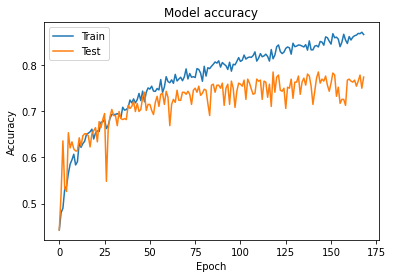

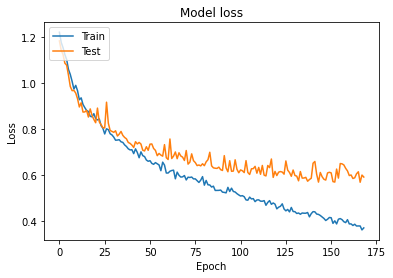

In [9]:
import matplotlib.pyplot as plt


# 绘制训练 & 验证的准确率值
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 绘制训练 & 验证的损失值
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# test model predict

[[9.4687736e-01 5.3105101e-02 1.7600580e-05 6.5932815e-09 1.3671522e-18
  1.2754499e-10]]


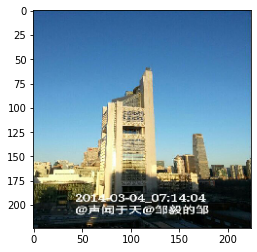

In [1]:
import numpy as np
from keras.preprocessing import image
from matplotlib import pyplot as plt
img = image.load_img("image.jpg",target_size=(224,224))#please change file name to yours
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
from keras.models import load_model
saved_model = load_model("vgg16_four_level.h5")
output = saved_model.predict(img)
print(output)


# model evaluation

In [ ]:
from keras.models import load_model
from keras.layers import Lambda
import tensorflow as tf
from keras_preprocessing.image import ImageDataGenerator
from tensorflow_model_optimization.quantization.keras import vitis_quantize
import numpy as np

In [ ]:
test_datagen=ImageDataGenerator()

In [ ]:
# An highlighted block
validation_generator = test_datagen.flow_from_directory(
    directory="all_test_AQI_picture", target_size=(224,224),shuffle=False)# you have to change directory name to yours

In [ ]:
saved_model = load_model("vgg16_four_level.h5")

In [ ]:
# An highlighted block
Pred = saved_model.predict_generator(validation_generator, verbose=1)


In [ ]:
y_pred = np.argmax(Pred, axis=1)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(validation_generator.classes,y_pred))

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
matrix=confusion_matrix(validation_generator.classes, y_pred)

In [ ]:
#混淆矩陣視覺化(Heatmap)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
class_names=[0,1,2,3,4,5] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
